In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [71]:
mnist_train = pd.read_csv('/content/drive/MyDrive/datasets/poker-hand-training-true.data',header = None)
mnist_test = pd.read_csv('/content/drive/MyDrive/datasets/poker-hand-testing.data',header = None)

In [72]:
col = [i for i in range(1,len(mnist_train.columns))]
row = [i for i in range(0,100)]
y_df_train = mnist_train.iloc[:,[0]]
x_df_train = mnist_train.iloc[:,col]
y_df_test = mnist_test.iloc[row,[0]]
x_df_test = mnist_test.iloc[row,col]

In [73]:
X_train = x_df_train.to_numpy()
Y_train = y_df_train.to_numpy().flatten()
X_test = x_df_test.to_numpy()
Y_test = y_df_test.to_numpy().flatten()

In [77]:
print(len(X_train))

25010


In [83]:
# Import necessary modules
# Split into training and test set
  
knn = KNeighborsClassifier(n_neighbors=10)
  
knn.fit(X_train, Y_train)
  
# Predict on dataset which model has not seen before
print(knn.predict(X_test))

[2 1 1 1 3 2 1 2 1 1 1 4 2 1 1 4 1 4 4 2 1 2 4 3 1 2 2 4 4 4 1 1 1 1 4 2 3
 1 1 4 2 2 2 4 1 1 1 3 4 2 3 1 3 3 3 3 4 3 2 2 2 2 2 2 1 1 2 3 3 2 2 2 3 1
 1 1 1 2 3 2 3 3 3 3 3 1 2 4 1 3 3 3 3 1 3 3 1 1 2 1]


In [84]:
# Calculate the accuracy of the model
print(knn.score(X_test, Y_test))

0.23


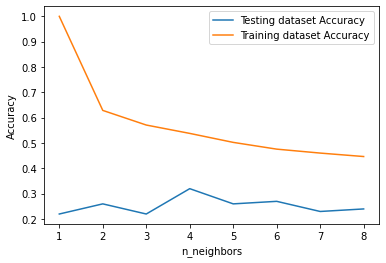

In [85]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()